In [ ]:
# 🔧 Install Ultralytics
!pip install ultralytics --upgrade -q

# 🔍 Check GPU
import torch
print("✅ GPU Available!" if torch.cuda.is_available() else "❌ GPU not available.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.6 MB/s eta 0:00:00
✅ GPU Available!


In [ ]:
from google.colab import files

print("📁 Please upload your yolo_dataset.zip file (should contain images/, labels/, dataset.yaml)")
uploaded = files.upload()

📁 Please upload your yolo_dataset.zip file (should contain images/, labels/, dataset.yaml)


Saving yolo_dataset.zip to yolo_dataset.zip


In [ ]:
# FIXED: Unzip directly to /content/
import zipfile
import os

zip_path = next(iter(uploaded))
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")  # Not /content/yolo_dataset

print("✅ Fixed unzip path!")

✅ Fixed unzip path!


In [ ]:
from ultralytics import YOLO

# 📍 Path to dataset.yaml
yaml_path = "/content/yolo_dataset/dataset.yaml"

# 🏋️ Train model
model = YOLO("yolov10s.pt")  # or yolov10m.pt, yolov10l.pt for larger models
model.train(
    data=yaml_path,
    epochs=10,
    imgsz=416,
    batch=32,
    project="runs",
    name="yolov10-hands",
)

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/yolo_dataset/dataset.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs, name=yolov10-hands9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 118MB/s]


Overriding model.yaml nc=80 with nc=39

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 299MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo_dataset/labels/train... 48152 images, 0 backgrounds, 11 corrupt: 100%|██████████| 48152/48152 [00:31<00:00, 1525.91it/s]

train: WARNING ⚠️ /content/yolo_dataset/images/train/A2855.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0156]
train: WARNING ⚠️ /content/yolo_dataset/images/train/R1349.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0024]
train: WARNING ⚠️ /content/yolo_dataset/images/train/Z2276.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [       1.03]
train: WARNING ⚠️ /content/yolo_dataset/images/train/Z2286.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.012]
train: WARNING ⚠️ /content/yolo_dataset/images/train/Z2305.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0252]
train: WARNING ⚠️ /content/yolo_dataset/images/train/Z2518.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0156]
train: WARNING ⚠️ /content/yolo_dataset/images/train/Z2519.jpg: ignoring corrupt image/l

train: New cache created: /content/yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolo_dataset/labels/val... 12056 images, 0 backgrounds, 5 corrupt: 100%|██████████| 12056/12056 [00:06<00:00, 1992.20it/s]

val: WARNING ⚠️ /content/yolo_dataset/images/val/M2160.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0192]
val: WARNING ⚠️ /content/yolo_dataset/images/val/Z2523.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.006]
val: WARNING ⚠️ /content/yolo_dataset/images/val/Z2525.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0084]
val: WARNING ⚠️ /content/yolo_dataset/images/val/Z2566.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0084]
val: WARNING ⚠️ /content/yolo_dataset/images/val/Z2640.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0072]


val: New cache created: /content/yolo_dataset/labels/val.cache
Plotting labels to runs/yolov10-hands9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000233, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/yolov10-hands9
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.34G      1.708      5.656      2.175         13        416: 100%|██████████| 1505/1505 [09:30<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:19<00:00,  2.39it/s]


                   all      12051      12051      0.871      0.704      0.744      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.02G      1.306     0.7927      1.885         13        416: 100%|██████████| 1505/1505 [09:16<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:17<00:00,  2.43it/s]


                   all      12051      12051      0.798      0.766       0.77      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.03G      1.251     0.6916      1.871         13        416: 100%|██████████| 1505/1505 [08:59<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:13<00:00,  2.56it/s]


                   all      12051      12051      0.812      0.762      0.779       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.03G      1.197     0.6325      1.853         13        416: 100%|██████████| 1505/1505 [09:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:15<00:00,  2.49it/s]


                   all      12051      12051      0.835      0.776      0.784       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.03G      1.118     0.5612      1.825         13        416: 100%|██████████| 1505/1505 [08:57<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:13<00:00,  2.57it/s]

                   all      12051      12051      0.826      0.783      0.803      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.03G      1.062     0.5135      1.807         13        416: 100%|██████████| 1505/1505 [08:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:13<00:00,  2.59it/s]


                   all      12051      12051      0.869      0.796      0.821      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.03G      1.002     0.4763      1.784         13        416: 100%|██████████| 1505/1505 [08:57<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:12<00:00,  2.61it/s]


                   all      12051      12051      0.854      0.821      0.826      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.03G     0.9585     0.4443      1.769         13        416: 100%|██████████| 1505/1505 [08:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:12<00:00,  2.62it/s]


                   all      12051      12051      0.839      0.843      0.839      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.03G     0.9136      0.413      1.755         13        416: 100%|██████████| 1505/1505 [08:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:12<00:00,  2.59it/s]


                   all      12051      12051      0.869       0.83      0.843      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.03G     0.8667     0.3905      1.742         13        416: 100%|██████████| 1505/1505 [08:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:12<00:00,  2.59it/s]


                   all      12051      12051       0.84      0.856      0.852      0.762

10 epochs completed in 1.727 hours.
Optimizer stripped from runs/yolov10-hands9/weights/last.pt, 16.5MB
Optimizer stripped from runs/yolov10-hands9/weights/best.pt, 16.5MB

Validating runs/yolov10-hands9/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 129 layers, 8,065,146 parameters, 0 gradients, 24.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 189/189 [01:13<00:00,  2.57it/s]


                   all      12051      12051       0.84      0.857      0.852      0.762
                     0          8          8      0.594          1      0.962      0.854
                     1          3          3          1          0      0.357     0.0801
                     2          1          1          0          0          0          0
                     3          1          1          0          0          0          0
                     4          3          3      0.858      0.333      0.382       0.35
                     5          4          4      0.766       0.75      0.754       0.64
                     6          2          2      0.377      0.923      0.448      0.305
                     7          7          7      0.692          1      0.995      0.641
                     8          1          1          0          0          0          0
                     9         21         21      0.816      0.847      0.833      0.639
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79f7e3676450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,  

In [ ]:
from google.colab import files

model_path = "/content/runs/yolov10-hands9/weights/best.pt"  # Change if your folder name is different
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

model_path = "/content/runs/yolov10-hands9/weights/last.pt"  # Change if your folder name is different
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Epoch data
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Precision, Recall, and mAP50 values from the logs for each epoch
precision = [0.871, 0.798, 0.812, 0.835, 0.826, 0.869, 0.854, 0.839, 0.869, 0.84]
recall = [0.704, 0.766, 0.762, 0.776, 0.783, 0.796, 0.821, 0.843, 0.83, 0.856]
mAP50 = [0.744, 0.77, 0.779, 0.784, 0.803, 0.821, 0.826, 0.839, 0.843, 0.852]
mAP50_95 = [0.615, 0.641, 0.66, 0.67, 0.698, 0.719, 0.727, 0.747, 0.751, 0.762]

# Create a DataFrame to store this data
data = {
    'Epoch': epochs,
    'Precision': precision,
    'Recall': recall,
    'mAP50': mAP50,
    'mAP50-95': mAP50_95
}

df = pd.DataFrame(data)

# Display the formatted results
print(df)


   Epoch  Precision  Recall  mAP50  mAP50-95
0      1      0.871   0.704  0.744     0.615
1      2      0.798   0.766  0.770     0.641
2      3      0.812   0.762  0.779     0.660
3      4      0.835   0.776  0.784     0.670
4      5      0.826   0.783  0.803     0.698
5      6      0.869   0.796  0.821     0.719
6      7      0.854   0.821  0.826     0.727
7      8      0.839   0.843  0.839     0.747
8      9      0.869   0.830  0.843     0.751
9     10      0.840   0.856  0.852     0.762


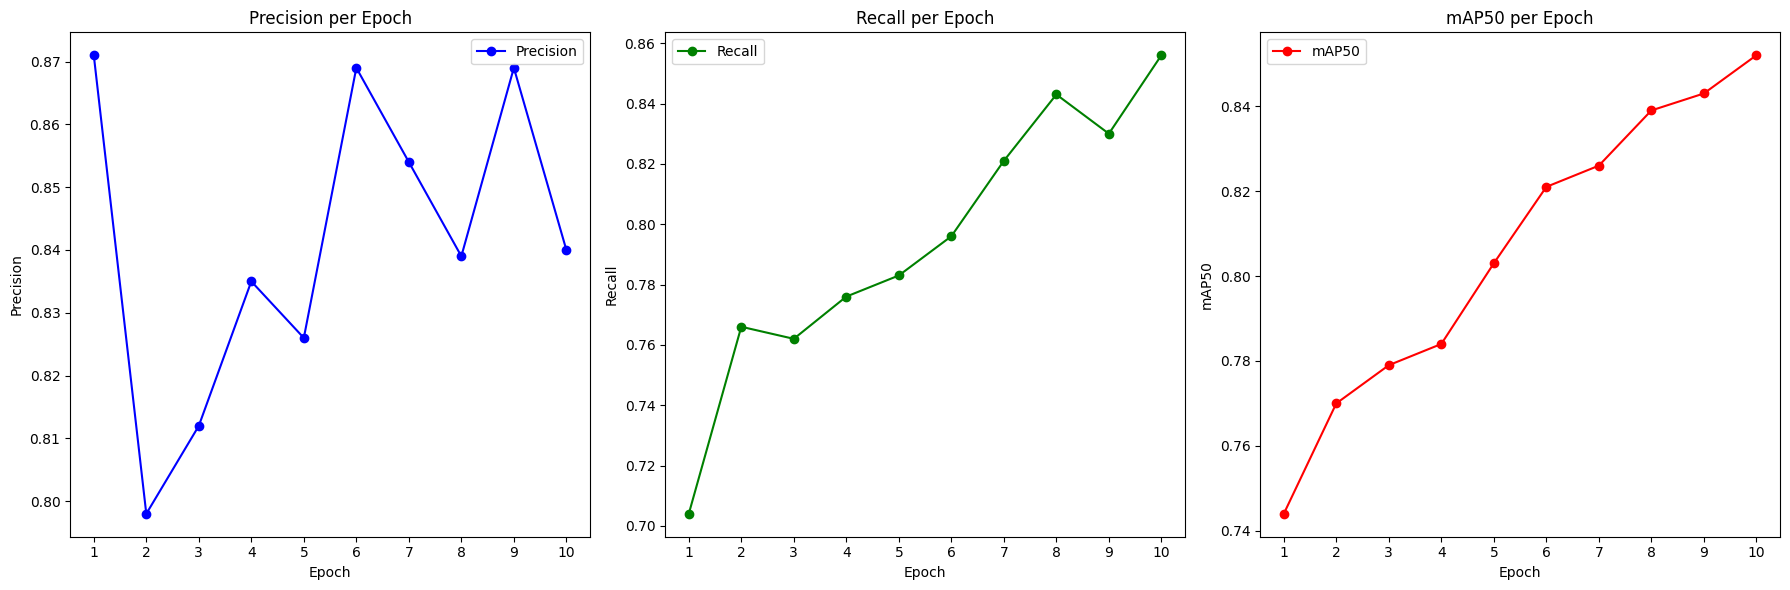

In [ ]:
import matplotlib.pyplot as plt

# Epoch data
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Precision, Recall, and mAP50 values from the logs for each epoch
precision = [0.871, 0.798, 0.812, 0.835, 0.826, 0.869, 0.854, 0.839, 0.869, 0.84]
recall = [0.704, 0.766, 0.762, 0.776, 0.783, 0.796, 0.821, 0.843, 0.83, 0.856]
mAP50 = [0.744, 0.77, 0.779, 0.784, 0.803, 0.821, 0.826, 0.839, 0.843, 0.852]
mAP50_95 = [0.615, 0.641, 0.66, 0.67, 0.698, 0.719, 0.727, 0.747, 0.751, 0.762]

# Create subplots for Precision, Recall, and mAP50
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot Precision over epochs
ax1.plot(epochs, precision, marker='o', color='blue', label='Precision')
ax1.set_title('Precision per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Precision')
ax1.set_xticks(epochs)
ax1.legend()

# Plot Recall over epochs
ax2.plot(epochs, recall, marker='o', color='green', label='Recall')
ax2.set_title('Recall per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Recall')
ax2.set_xticks(epochs)
ax2.legend()

# Plot mAP50 over epochs
ax3.plot(epochs, mAP50, marker='o', color='red', label='mAP50')
ax3.set_title('mAP50 per Epoch')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('mAP50')
ax3.set_xticks(epochs)
ax3.legend()

# Adjust layout
plt.tight_layout()
plt.show()
